In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [141]:
df=pd.read_csv('Startups.csv')
nn_df=df.copy()
nn_df.drop(['Administration'],axis=1)
nn_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [152]:
df.describe()

x = nnndf.iloc[:,:-1].values
y = nnndf.iloc[:,-1].values

In [153]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

c=ColumnTransformer(transformers=[('encoding',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(c.fit_transform(x))
x
np.delete(x,3,1)
# n_df=pd.DataFrame(x)

array([[0.0, 0.0, 1.0, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 145077.58, 282574.31],
       [0.0, 1.0, 0.0, 114175.79, 294919.57],
       [0.0, 0.0, 1.0, 153514.11, 0.0],
       [1.0, 0.0, 0.0, 113867.3, 298664.47],
       [0.0, 0.0, 1.0, 153773.43, 299737.29],


In [154]:
nnndf.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [155]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
y_test.shape

(10,)

In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(x)

lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
y.shape

(50,)

In [157]:
pred=lin_reg.predict(X_poly)

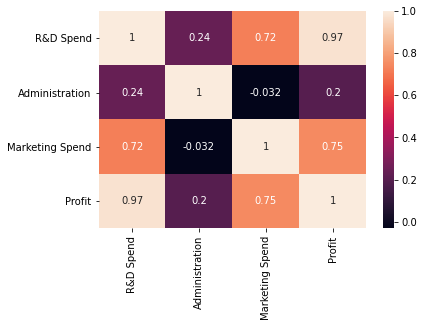

In [135]:
corr=nnndf.corr()
# plt.plot(x, lin_reg.predict(poly.fit_transform(x)), color = 'blue')
# plt.show()
sns.heatmap(corr,annot=True,cbar=True)

In [158]:
from sklearn.metrics import r2_score

r=r2_score(pred,y)
r

0.9999997305889862